In [2]:
import numpy as np
import pandas as pd

from skimage import io
from skimage import color
import skimage.measure
import cv2
from IPython.display import SVG

import face_recognition

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

import tensorflow as tf
from keras import layers
import keras
from keras.utils import plot_model
from keras import backend as K

import random
import math
import os

import string
import time
import re
import nltk
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/errorgorn/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [6]:
tf.get_logger().setLevel('ERROR')

In [7]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [8]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

## NLP stuff

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/errorgorn/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/errorgorn/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [5]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    #print(tag_dict.get(tag, wordnet.NOUN))
    return tag_dict.get(tag, wordnet.NOUN)

pattern = re.compile("【|】|\[|\]")

# Initalize TweetTokenizer
tt = TweetTokenizer()

# English stop words
english_stops = stopwords.words('english')

printable = set(string.printable)

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def editString(title):
    title = pattern.sub("|",title)                             # replace square brackets with |
    title = "".join(filter(lambda x: x in printable, title))   # remove non printable characters
    #print(title)
    tokens = tt.tokenize(text=title)
    
    # Convert the tokens into lowercase: lower_tokens, indicate if capital
 Ame and   tokens_edited = [t.lower() + " [&CAP] " if (t.upper() == t and t.isalpha() and len(t) > 1) else t.lower() for t in tokens ]
    #print(tokens_edited)
    # Remove all stop words: no_stops
    no_stops = [t for t in tokens_edited if t not in english_stops]
    #print(no_stops)
    # Lemmatize all tokens into a new list: lemmatized
    lemmatized = [wordnet_lemmatizer.lemmatize(t, get_wordnet_pos(t)) for t in no_stops]
    #print(lemmatized)
    return " ".join(lemmatized)



## Get df stuff

In [9]:
def get_img(id):
    return mpimg.imread('thumbs/'+id+'.jpg')

In [10]:
def get_face(id,num):
    if (os.path.isfile('faces/'+id+'_'+str(num)+'.jpg')): return mpimg.imread('faces/'+id+'_'+str(num)+'.jpg')
    else: return np.ones((120,120,3),dtype='uint8')*128

In [49]:
def get_df(file):
    df=pd.read_csv(file,index_col=0)
    df=df.T
    df=df.reset_index(drop=True)
    
    #nlp
    df["title"]=df["title"].apply(editString)
    df["clickbait"]=df["clickbait"].astype(int)
    
    return df

In [50]:
df=get_df('scraping youtube/metadata.csv')
df2=get_df('human acc/metadata.csv')
df3=get_df('scraping youtube/metadata_b0.csv')

In [51]:
print(df2[df2["id"]=="SlPhMPnQ58k"])
print(df3[df3["id"]=="kJQP7kiw5Fk"])
print(df3[df3["id"]=="R_oVq2hCy70"])

                                    title              views            likes  \
35   maroon 5 - memory ( official video )  705,162,545 views  7,624,617 likes   
129  maroon 5 - memory ( official video )  705,163,401 views  7,624,619 likes   

             dislikes                                               desc  \
35   170,752 dislikes  “Memories” is out now:\nhttps://smarturl.it/Me...   
129  170,752 dislikes  “Memories” is out now:\nhttps://smarturl.it/Me...   

              id  clickbait  
35   SlPhMPnQ58k          0  
129  SlPhMPnQ58k          0  
                                        title                views  \
62   luis fonsi - despacito ft . daddy yankee  7,293,692,975 views   
137  luis fonsi - despacito ft . daddy yankee  7,293,692,975 views   

                likes            dislikes  \
62   43,569,832 likes  4,990,350 dislikes   
137  43,569,842 likes  4,990,351 dislikes   

                                                  desc           id  clickbait  
62   “Des

XXXXXXX SERIOUS ERROR XXXXXXXX

In [52]:
df2=df2.drop([35,129])
df3=df3.drop([128,137])

In [53]:
df_m=pd.concat([df,df2,df3])
df_m=df_m.set_index("id")
df_m

,title,views,likes,dislikes,desc,clickbait
id,,,,,,
K15jFOVrAy4,"veteran ' voice 2020 : general joseph votel , ...","22,540 views",92 likes,28 dislikes,"Veterans served their nation selflessly, but s...",0
lG3PEdw0xrU,make tandoori chicken,"1,724,176 views","93,482 likes","7,647 dislikes",Today I show you how to make authentic Tandoor...,1
0vUgGSLTtOg,25 airbag rainbow explosion 4k - slow mo guy,"6,431,213 views","185,758 likes","1,712 dislikes",Sometimes ideas get too big for our backyard s...,0
d17H1uhfYjw,hunt secret [&CAP] megalodon [&CAP] boss [&C...,"457,053 views","12,111 likes",386 dislikes,"If you enjoyed this video, watch more here: ht...",1
KTF1Nqvl8ug,maroon 5 - wanna know ( behind scene ),"1,050,911 views","27,807 likes",287 dislikes,"Buy “Don't Wanna Know"" ft. Kendrick LaMar now....",0
...,...,...,...,...,...,...
NddZ5ftQb0Q,cheeseburger hydrochloric acid - periodic tabl...,"19,789,646 views","23,927 likes","2,179 dislikes",You can support us on Patreon: https://www.pat...,0
gDmcL3LBEo4,real edge glory,"9,689,348 views","219,715 likes","1,970 dislikes",This is the greatest sharpener of All Time,1
fRh_vgS2dFE,justin bieber - sorry ( purpose [&CAP] : move...,"3,420,744,514 views","14,089,589 likes","1,660,385 dislikes",‘Purpose’ Available Everywhere Now!\niTunes: h...,0


In [54]:
s,s2,s3=df["id"],df2["id"],df3["id"]

## NLP 2

In [55]:
def load_dataset_from_df(df):
    #print(df)
    target = df['clickbait']
    values = df['title']
    dataset = tf.data.Dataset.from_tensor_slices((values, target))
    return dataset

In [56]:
batch_size = 32
validation_split = 0.2
raw_fulltrain_ds = load_dataset_from_df(df[4000:])
raw_fulltrain_ds.shuffle(buffer_size = 10000, seed=1337)
print("Loaded full train dataset")
train_size = int((1-validation_split) * int(tf.data.experimental.cardinality(raw_fulltrain_ds)))
raw_train_ds = raw_fulltrain_ds.take(train_size).batch(batch_size)
print("Loaded train dataset")
raw_val_ds = raw_fulltrain_ds.skip(train_size).batch(batch_size)
print("Loaded validation dataset")
#raw_test_ds = load_dataset_from_df(df_test).batch(batch_size)
#print("Loaded test dataset")
raw_fulltrain_ds = raw_fulltrain_ds.batch(batch_size)
print("Batched full train dataset")

Loaded full train dataset
Loaded train dataset
Loaded validation dataset
Batched full train dataset


In [57]:
print(
    "Number of batches in raw_train_ds: %d"
    % tf.data.experimental.cardinality(raw_train_ds)
)
print(
    "Number of batches in raw_val_ds: %d" % tf.data.experimental.cardinality(raw_val_ds)
)

Number of batches in raw_train_ds: 144
Number of batches in raw_val_ds: 36


In [58]:
# Model constants.
max_features = 10000
embedding_dim = 32
sequence_length = 300

# Now that we have our custom standardization, we can instantiate our text
# vectorization layer. We are using this layer to normalize, split, and map
# strings to integers, so we set our 'output_mode' to 'int'.
# Note that we're using the default split function,
# and the custom standardization defined above.
# We also set an explicit maximum sequence length, since the CNNs later in our
# model won't support ragged sequences.
vectorize_layer = TextVectorization(
    standardize = None,
    max_tokens=max_features,
    output_mode="int",
    output_sequence_length=sequence_length,
)

# Now that the vocab layer has been created, call `adapt` on a text-only
# dataset to create the vocabulary. You don't have to batch, but for very large
# datasets this means you're not keeping spare copies of the dataset in memory.

# Let's make a text-only dataset (no labels):
text_ds = raw_train_ds.map(lambda x, y: x)
text_dss = raw_fulltrain_ds.map(lambda x, y: x)
# Let's call `adapt`:
vectorize_layer.adapt(text_dss)

In [59]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label


# Vectorize the data.
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
#test_ds = raw_test_ds.map(vectorize_text)
fulltrain_ds = raw_fulltrain_ds.map(vectorize_text)

# Do async prefetching / buffering of the data for best performance on GPU.
train_ds = train_ds.cache().prefetch(buffer_size=50)
val_ds = val_ds.cache().prefetch(buffer_size=50)
#test_ds = test_ds.cache().prefetch(buffer_size=50)
fulltrain_ds = fulltrain_ds.cache().prefetch(buffer_size=50)

## Screwing around with images

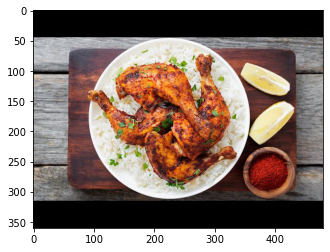

In [60]:
plt.imshow(get_img(df["id"][1])) #nice chicken

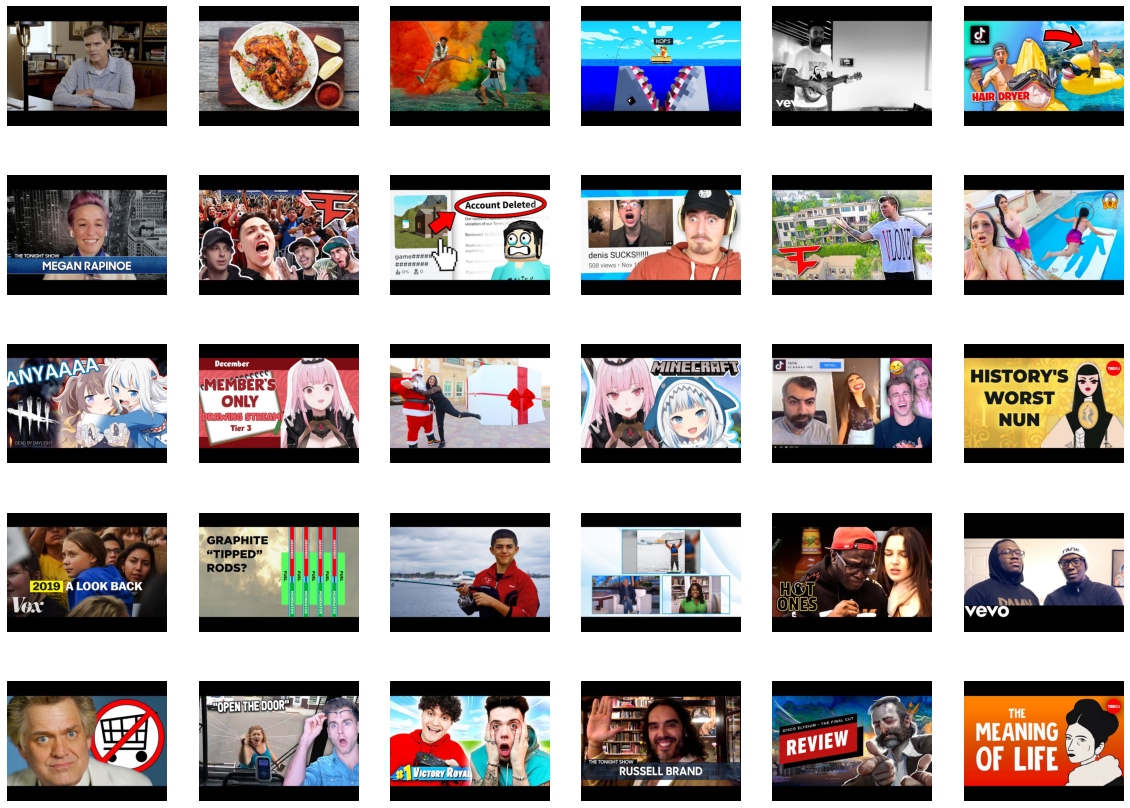

In [61]:
fig,axs=plt.subplots(5,6,figsize=(20,15))

for x in axs.ravel():
    x.axis('off')

for i in range(5):
    for j in range(6):
        axs[i,j].imshow(get_img(df["id"][i*6+j]))

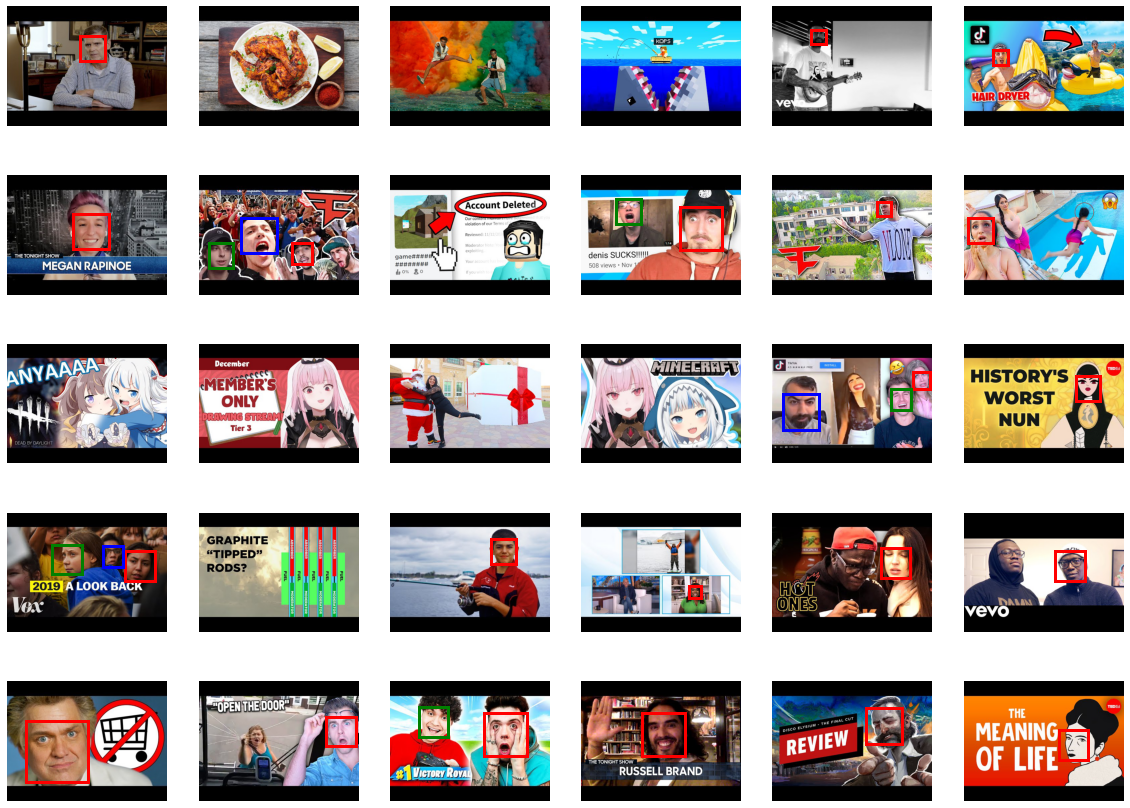

In [62]:
fig,axs=plt.subplots(5,6,figsize=(20,15))

for x in axs.ravel():
    x.axis('off')

for i in range(5):
    for j in range(6):
        img=get_img(df["id"][i*6+j])
        axs[i,j].imshow(img)
        
        locs=face_recognition.face_locations(img)
        
        for x in range(min(3,len(locs))):
            t,r,b,l=locs[x]
            
            rect=patches.Rectangle((l,t),r-l,b-t,linewidth=3,edgecolor="rgb"[x],facecolor='none')
            axs[i,j].add_patch(rect)

## autoencoders

In [63]:
def encoder(t,b,l,r):
    tf.keras.backend.clear_session() #prevent high mem usage
    
    n,m=b-t,r-l
    
    # read faces from files
    
    #blank image here (since we will have to process blank images later)
    faces=[np.ones(shape=(n*m,))*0.5]
    
    for file in os.listdir("faces"):
        face=mpimg.imread('faces/'+file)[:,:,0]
        face=cv2.resize(face,(96,96))
        face=face[t:b,l:r]
        face=face/256 #compress into [0,1]
        face+=0.5-face.mean()
        faces.append(face.reshape(-1)) #flatten
    
    faces=np.array(faces)
        
    #build autoencoder
    #it is actually just a single dense layer
    
    input_encoder=layers.Input((n*m,))
    
    #encoder
    encoded=layers.Dense(16,activation='sigmoid')(input_encoder) #latent space of 4

    encoder=keras.Model(
        inputs=[input_encoder],
        outputs=[encoded],
    )
    
    #decoder
    decoded=layers.Dense(n*m,activation='sigmoid')(encoded)

    train=keras.Model(
        inputs=[input_encoder],
        outputs=[decoded],
    )
    
    #train the autoencoder
    train.compile(
      optimizer="adam",
      loss="mean_squared_error",
    )
    
    #do 100 epochs
    train.fit(faces,faces,validation_split=0.2,epochs=20,batch_size=8,steps_per_epoch=1000)
    
    #display some examples of autoencoder
    fig,axs=plt.subplots(6,17,figsize=(17,6))
    
    for x in axs.ravel():
        x.axis('off')

    pred=train.predict(faces[:17])
    pred2=encoder.predict(faces[:17])

    for i in range(17):
        axs[0,i].imshow(faces[i].reshape(n,m)) #in
        axs[2,i].imshow(pred[i].reshape(n,m)) #out
        axs[1,i].imshow(pred2[i].reshape(4,4)) #latent space
        
    #get decoder
    train.get_weights()
    
    inp=layers.Input(16)
    dense=layers.Dense(n*m)(inp)
    
    decoder=keras.Model(
        inputs=[inp],
        outputs=[dense],
    )
    decoder.set_weights(train.get_weights()[2:])
    
    temp=np.zeros(shape=(17,16))
    for i in range(16): temp[i+1][i]=1
    
    #show each parameter of the latent layer
    pred=decoder.predict(temp)
    
    for i in range(17):
        axs[5,i].imshow(pred[i].reshape(n,m)) #out
        axs[4,i].imshow(temp[i].reshape(4,4)) #latent space
    
    #return encoder and converter for use later
    return encoder,train

Epoch 1/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0243 - val_loss: 0.0156
Epoch 2/20
1000/1000 [==============================] - 1s 954us/step - loss: 0.0148 - val_loss: 0.0125
Epoch 3/20
1000/1000 [==============================] - 1s 960us/step - loss: 0.0119 - val_loss: 0.0111
Epoch 4/20
1000/1000 [==============================] - 1s 928us/step - loss: 0.0108 - val_loss: 0.0101
Epoch 5/20
1000/1000 [==============================] - 1s 941us/step - loss: 0.0099 - val_loss: 0.0095
Epoch 6/20
1000/1000 [==============================] - 1s 936us/step - loss: 0.0093 - val_loss: 0.0091
Epoch 7/20
1000/1000 [==============================] - 1s 989us/step - loss: 0.0089 - val_loss: 0.0088
Epoch 8/20
1000/1000 [==============================] - 1s 949us/step - loss: 0.0086 - val_loss: 0.0086
Epoch 9/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 10/20
1000/1000 [==============================] - 1s 1ms/step

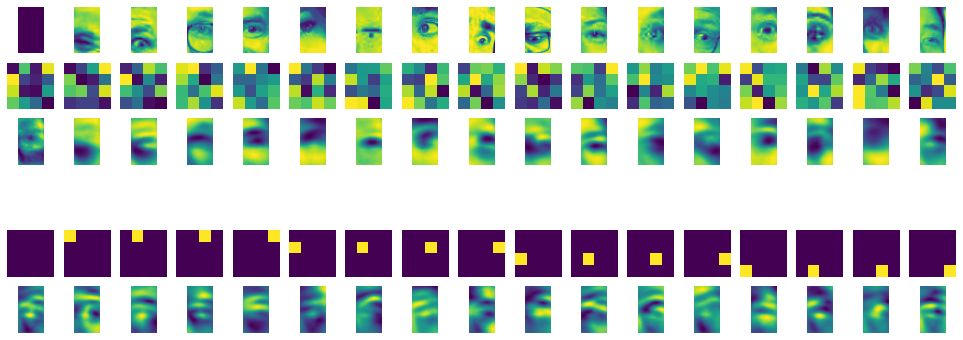

In [64]:
encode_eye,conv_eye=encoder(4,48,56,80)

Epoch 1/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0255 - val_loss: 0.0169
Epoch 2/20
1000/1000 [==============================] - 1s 999us/step - loss: 0.0161 - val_loss: 0.0150
Epoch 3/20
1000/1000 [==============================] - 1s 979us/step - loss: 0.0143 - val_loss: 0.0129
Epoch 4/20
1000/1000 [==============================] - 1s 997us/step - loss: 0.0129 - val_loss: 0.0119
Epoch 5/20
1000/1000 [==============================] - 1s 989us/step - loss: 0.0122 - val_loss: 0.0114
Epoch 6/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0113 - val_loss: 0.0111
Epoch 7/20
1000/1000 [==============================] - 1s 988us/step - loss: 0.0110 - val_loss: 0.0108
Epoch 8/20
1000/1000 [==============================] - 1s 975us/step - loss: 0.0110 - val_loss: 0.0107
Epoch 9/20
1000/1000 [==============================] - 1s 984us/step - loss: 0.0105 - val_loss: 0.0105
Epoch 10/20
1000/1000 [==============================] - 1s 959us/st

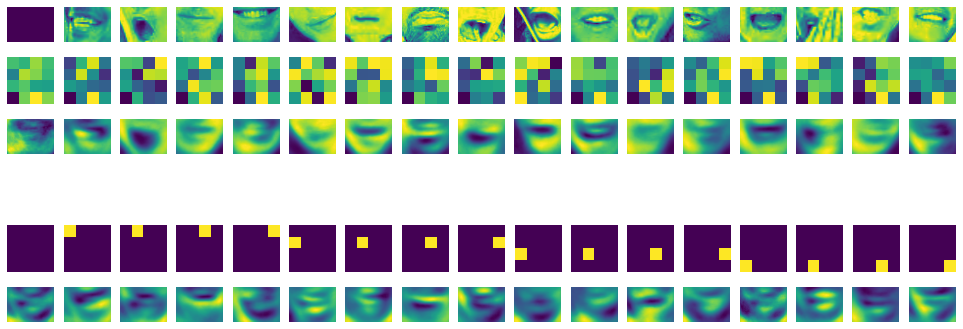

In [65]:
encode_mouth,conv_mouth=encoder(60,96,24,72)

idk why i thought bottom was funny

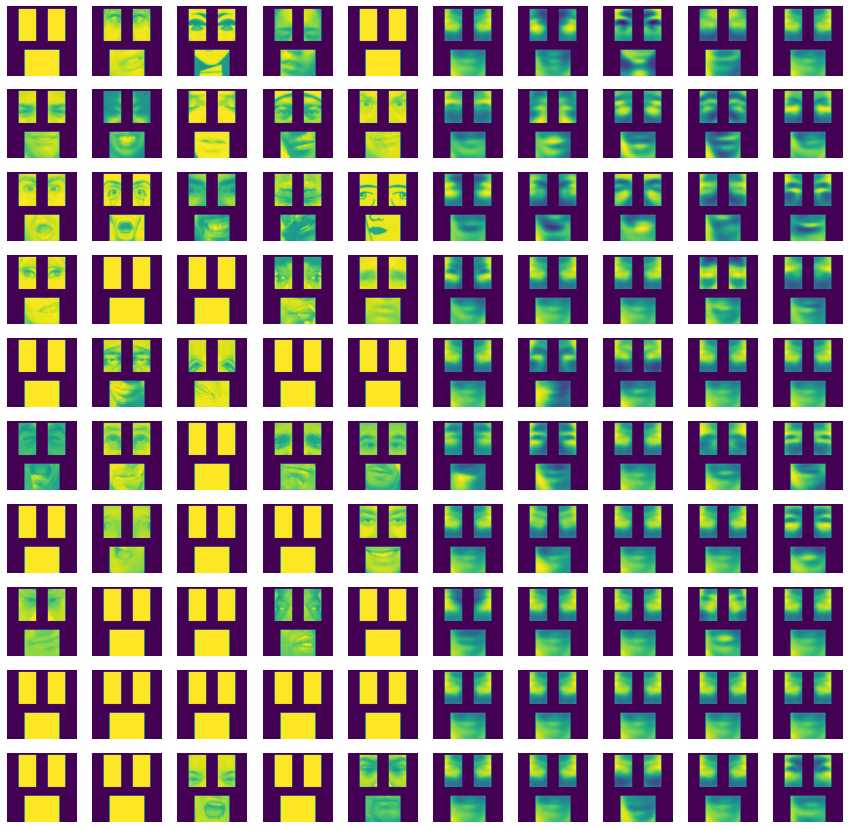

In [66]:
fig,axs=plt.subplots(10,10,figsize=(15,15))

for x in axs.ravel():
    x.axis('off')

for i in range(50):
    img=get_face(df["id"][i+15],0)[:,:,0]
    img=cv2.resize(img,(96,96))
    img=img/256
    img+=0.5+img.mean()

    face_i=np.zeros((96,96))
    face=np.zeros((96,96))

    eye_i=img[4:48,56:80]
    face_i[4:48,56:80]=eye_i
    face_i[4:48,96-80:96-56]=eye_i[:,::-1]

    eye=conv_eye.predict(eye_i.reshape(1,44*24))[0].reshape(44,24)
    face[4:48,56:80]=eye
    face[4:48,96-80:96-56]=eye[:,::-1]


    mouth_i=img[60:96,24:72]
    face_i[60:96,24:72]=mouth_i

    mouth=conv_mouth.predict(mouth_i.reshape(1,36*48))[0].reshape(36,48)
    face[60:96,24:72]=mouth


    axs[i//5][i%5].imshow(face_i)
    axs[i//5][i%5+5].imshow(face)

## model

In [67]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

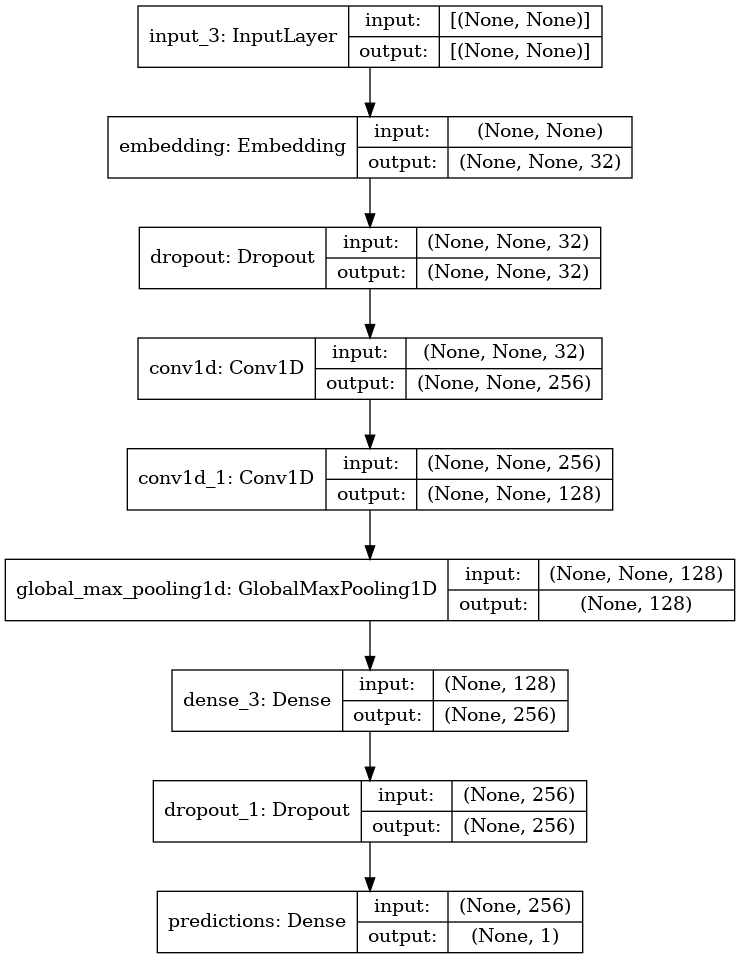

In [68]:
from tensorflow.keras import layers

# A integer input for vocab indices.
inputs = tf.keras.Input(shape=(None,), dtype="int64")

# Next, we add a layer to map those vocab indices into a space of dimensionality
# 'embedding_dim'.
x = layers.Embedding(max_features, embedding_dim)(inputs)
x = layers.Dropout(0.7)(x)

# Conv1D + global max pooling
x = layers.Conv1D(256, 7, padding="valid", activation="relu", strides=2)(x)
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=2)(x)
x = layers.GlobalMaxPooling1D()(x)

# We add a vanilla hidden layer:
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)

# We project onto a single unit output layer, and squash it with a sigmoid:
predictions = layers.Dense(1, activation="sigmoid", name="predictions")(x)

model = tf.keras.Model(inputs, predictions)

# Compile the model with binary crossentropy loss and an adam optimizer.
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc", precision_m, recall_m, f1_m])
plot_model(model,show_layer_names=1,show_shapes=True)

In [69]:
epochs = 5
model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/5
144/144 [==============================] - 6s 21ms/step - loss: 0.6484 - acc: 0.6167 - precision_m: 0.3152 - recall_m: 0.1852 - f1_m: 0.2181 - val_loss: 0.2908 - val_acc: 0.8772 - val_precision_m: 0.8810 - val_recall_m: 0.8452 - val_f1_m: 0.8555
Epoch 2/5
144/144 [==============================] - 1s 7ms/step - loss: 0.3032 - acc: 0.8634 - precision_m: 0.8844 - recall_m: 0.7936 - f1_m: 0.8301 - val_loss: 0.2153 - val_acc: 0.9094 - val_precision_m: 0.9139 - val_recall_m: 0.8801 - val_f1_m: 0.8922
Epoch 3/5
144/144 [==============================] - 1s 6ms/step - loss: 0.1945 - acc: 0.9218 - precision_m: 0.9246 - recall_m: 0.9021 - f1_m: 0.9099 - val_loss: 0.2059 - val_acc: 0.9094 - val_precision_m: 0.9118 - val_recall_m: 0.8824 - val_f1_m: 0.8917
Epoch 4/5
144/144 [==============================] - 1s 7ms/step - loss: 0.1426 - acc: 0.9394 - precision_m: 0.9382 - recall_m: 0.9245 - f1_m: 0.9292 - val_loss: 0.2113 - val_acc: 0.9042 - val_precision_m: 0.9003 - val_recall_m: 0.885